# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неоконченное высшее', 'Два и более высших образования', 'Среднее специальное', 'Ученая степень', 'Среднее', 'Неполное среднее', 'Высшее'}


MARITAL_STATUS
{'Не состоял в браке', 'Гражданский брак', 'Разведен(а)', 'Состою в браке', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Другие сферы', 'ЧОП/Детективная д-ть', 'Здравоохранение', 'Транспорт', 'Сельское хозяйство', 'Образование', 'Наука', 'Ресторанный бизнес/Общественное питание', 'Коммунальное хоз-во/Дорожные службы', 'Банк/Финансы', 'Управляющая компания', 'Юридические услуги/нотариальные услуги', 'Информационные технологии', 'Салоны красоты и здоровья', 'Сборочные производства', 'Развлечения/Искусство', 'Подбор персонала', 'Нефтегазовая промышленность', 'Недвижимость', 'Энергетика', 'Химия/Парфюмерия/Фармацевтика', 'Страхование', 'СМИ/Реклама/PR-агенства', 'Логистика', 'Туризм', 'Государственная служба', 'Металлургия/Промышленность/Машиностроение', 'Маркетинг', 'Информационные услуги', 'Строительство', 'Торговля'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [ ]:
#да, по-возмодности заполнить или удалить


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
#да-закодировать

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [19]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']
print (categorical_columns)

print ('---------------------------------')
print (numerical_columns)

['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'PERSONAL_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT', 'sample']
---------------------------------
['AGREEMENT_RK', 'TARGET', 'AGE', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL', 'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'OWN_AUTO', 'AUTO_RUS_FL', 'HS_PRESENCE_FL', 'COT_PRESENCE_FL', 'GAR_PRESENCE_FL', 'LAND_PRESENCE_FL', 'TERM', 'DL_DOCUMENT_FL', 'GPF_DOCUMENT_FL', 'FACT_LIVING_TERM', 'WORK_TIME', 'FACT_PHONE_FL', 'REG_PHONE_FL', 'GEN_PHONE_FL', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'LOAN_NUM_PAYM', 'LOAN_DLQ_NUM', 'LOAN_MAX_DLQ', 'PREVIOUS_CARD_NUM_UTILIZED']


In [27]:
df['GEN_INDUSTRY'].describe()


count        27420
unique          31
top       Торговля
freq          4707
Name: GEN_INDUSTRY, dtype: object

In [29]:
df['GEN_INDUSTRY'].describe()


count        27420
unique          31
top       Торговля
freq          4707
Name: GEN_INDUSTRY, dtype: object

In [30]:

df['GEN_TITLE'].describe()


count          27420
unique            12
top       Специалист
freq           13981
Name: GEN_TITLE, dtype: object

In [31]:
df['ORG_TP_STATE'].describe()


count                27420
unique                   5
top       Частная компания
freq                 12896
Name: ORG_TP_STATE, dtype: object

In [35]:
df['JOB_DIR'].describe()


count                             27420
unique                               10
top       Участие в основ. деятельности
freq                              22613
Name: JOB_DIR, dtype: object

In [36]:

df[ 'ORG_TP_FCAPITAL'].describe()


count           27425
unique              2
top       Без участия
freq            27099
Name: ORG_TP_FCAPITAL, dtype: object

In [69]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output = df_output.fillna(df_output.median(axis=0), axis=0)
    
    
    data_describe = df_output.describe(include=[object])
    for c in categorical_columns:
        df_output[c] = df_output[c].fillna(data_describe[c]['top'])
    
    

    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    df_output.loc[:, 'PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output.loc[:,'CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output.loc[:,'FST_PAYMENT'] =  df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output.loc[:, 'LOAN_AVG_DLQ_AMT']= df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output.loc[:,'LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    
    
    
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'PERSONAL_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT'])
    ## Your Code Here
    
    
    return df_output

In [70]:
df_preproc = df.pipe(preproc_data)

In [71]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [72]:
df_preproc.head ()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,...,LOAN_MAX_DLQ_AMT_10640.0,LOAN_MAX_DLQ_AMT_11310.0,LOAN_MAX_DLQ_AMT_11460.0,LOAN_MAX_DLQ_AMT_13920.0,LOAN_MAX_DLQ_AMT_14870.0,LOAN_MAX_DLQ_AMT_14970.0,LOAN_MAX_DLQ_AMT_14990.0,LOAN_MAX_DLQ_AMT_15110.0,LOAN_MAX_DLQ_AMT_18310.0,LOAN_MAX_DLQ_AMT_28012.2
0,0,30,1,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,48,0,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,35,1,0,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,22,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,27,1,0,1,2,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 21989 entries, TARGET to LOAN_MAX_DLQ_AMT_28012.2
dtypes: float64(2), int64(31), object(1), uint8(21955)
memory usage: 638.7+ MB


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [78]:
X = df_train_preproc.drop(('TARGET'), axis=1)  
y = df_train_preproc['TARGET']
X_test =df_test_preproc.drop (('TARGET'), axis=1)
Y_test =df_test_preproc['TARGET']




#### Задание 5. Обучение и оценка качества разных моделей

In [79]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [80]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit(X, y),  обучение (тренировка) модели на обучающей выборке X, y
#     predict (X),  предсказание на данных X
#     predict_proba

from sklearn.tree import DecisionTreeClassifier #  деревья решений
from sklearn.ensemble import RandomForestClassifier #  случайный лес
from sklearn.linear_model import LogisticRegression #  логистическая регрессия




In [81]:
## Your Code Here
DesTree= DecisionTreeClassifier()
DesTree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [94]:
RandomF= RandomForestClassifier(n_estimators=1000)
RandomF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
LogisticR= LogisticRegression()
LogisticR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
y_train_predict = DesTree.predict(X_train)
y_test_predict = DesTree.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print (err_train, err_test)

0.0 0.1633457411867747


In [95]:
RandomFpredict = RandomF.predict(X_test)

In [97]:
RandomFpredict = RandomF.predict(X_test)

In [98]:
LogisticRpredict = LogisticR.predict(X_test)

In [99]:
predict_proba1 = DesTree.predict_proba(X_test)
predict_proba2 = DesTree.predict_proba(X_test)
predict_proba3 = LogisticR.predict_proba(X_test)

In [103]:
predict_proba1 [:,1]


array([0., 0., 0., ..., 0., 1., 0.])

In [101]:
predict_proba2 [:,1]


array([0., 0., 0., ..., 0., 1., 0.])

In [102]:
predict_proba3 [:,1]

array([0.24525483, 0.08997861, 0.28797627, ..., 0.06757642, 0.12450787,
       0.0663052 ])

In [104]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here

In [106]:
print('precision', precision_score(y_test, y_test_predict))
print('recall', recall_score(y_test, y_test_predict))
print('accuracy', accuracy_score(y_test, y_test_predict))


precision 0.1449814126394052
recall 0.07027027027027027
accuracy 0.8366542588132253


In [107]:
print('precision', precision_score(y_test,RandomFpredict))
print('recall', recall_score(y_test, RandomFpredict))
print('accuracy', accuracy_score(y_test, RandomFpredict))


precision 0.0
recall 0.0
accuracy 0.8784760236479089


/Users/nika/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [108]:
print('precision', precision_score(y_test, LogisticRpredict))
print('recall', recall_score(y_test, LogisticRpredict))
print('accuracy', accuracy_score(y_test, LogisticRpredict))


precision 0.6666666666666666
recall 0.0036036036036036037
accuracy 0.8786949857674622


In [ ]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
   
plt.figure(figsize=(5, 5))
plt.plot(precision_score(y_test, LogisticRpredict),recall_score(y_test, LogisticRpredict))
plt.plot(precision_score(y_test,RandomFpredict), recall_score(y_test, RandomFpredict))
plt.plot(precision_score(y_test, y_test_predict), recall_score(y_test, y_test_predict))
plt.plot([0, 1], [0, 1])
plt.ylabel('precision')
plt.xlabel('recall')
plt.grid(True)
plt.title('title')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

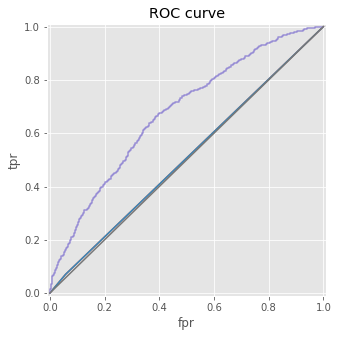

In [122]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, predict_proba1[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, predict_proba2[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, predict_proba3[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr1, tpr1)
plt.plot(fpr2, tpr2)
plt.plot(fpr3, tpr3)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [126]:
roc_auc_score(y_test, predict_proba1[:,1])
roc_auc_score(y_test, predict_proba2[:,1])
roc_auc_score(y_test, predict_proba[:,1])

0.5064711271590634

In [124]:
roc_auc_score(y_test, predict_proba2[:,1])


0.5064711271590634

In [125]:
roc_auc_score(y_test, predict_proba3[:,1])

0.6753904951811233

In [ ]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

dtc = RandomForestClassifier(n_estimators=1000)
cross_val_score(
    dtc,
    df_train_preproc.drop(('TARGET'), axis=1)  ,
    df_train_preproc['TARGET']  ,
    scoring='roc_auc',
    cv=10
)

In [ ]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

dtc1 = LogisticRegression()
cross_val_score(
    dtc,
    df_train_preproc.drop(('TARGET'), axis=1)  ,
    df_train_preproc['TARGET']  ,
    scoring='roc_auc',
    cv=10
)

In [ ]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

predict1 = dtc1.predict(X_test)
## Your Code Here
y_train_predict = DesTree.predict(X_train)


err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print (err_train, err_test)

In [ ]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here
 predict_probabest=dtc1.predict_proba(X_test)
roc_auc1= roc_auc_score(y_test, predict_probabest[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, predict_proba1[:,1])

plt.figure(figsize=(5, 5))
plt.plot(fpr1, tpr1)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title(roc_auc1)
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)